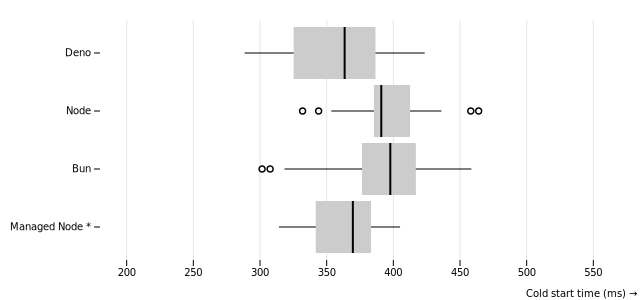

In [2]:
import { parse, stringify } from "jsr:@std/csv";
import * as Plot from "npm:@observablehq/plot";
import { DOMParser, SVGElement } from "npm:linkedom";

// To change the chart, update the filepath /raw_results/{framework}/...

const denoCsv = await Deno.readTextFile("../raw_results/express/deno-docker-x86_64.csv");
const nodeCsv = await Deno.readTextFile("../raw_results/express/node-docker-x86_64.csv");
const bunCsv = await Deno.readTextFile("../raw_results/express/bun-docker-x86_64.csv");
const nodeNativeCsv = await Deno.readTextFile("../raw_results/express/node-native-x86_64.csv");

const denoData = parse(denoCsv);
const nodeData = parse(nodeCsv);
const bunData = parse(bunCsv);
const nodeNativeData = parse(nodeNativeCsv);

// Create data for plot.
let plotData = [];
for (let i = 0; i < 20; i++) {
  plotData.push({
    runtime: "Deno",
    iteration: i,
    cold_start_time: parseFloat(denoData[1 + i][1])
  });
}
for (let i = 0; i < 20; i++) {
  plotData.push({
    runtime: "Node",
    iteration: i,
    cold_start_time: parseFloat(nodeData[1 + i][1])
  });
}
for (let i = 0; i < 20; i++) {
  plotData.push({
    runtime: "Bun",
    iteration: i,
    cold_start_time: parseFloat(bunData[1 + i][1])
  });
}
for (let i = 0; i < 20; i++) {
  plotData.push({
    runtime: "Managed Node *",
    iteration: i,
    cold_start_time: parseFloat(nodeNativeData[1 + i][1])
  });
}

// Plot.

const document = new DOMParser().parseFromString(`<!DOCTYPE html><html lang="en"></html>`, "text/html");

const plot = (Plot.plot({
  document,
  marginLeft: 100,
  marginBottom: 40,
  height: 300,
  x: { 
    domain: [180, 570],
    grid: true,
    label: "Cold start time (ms)"
  },
  y: {
    domain: ["Deno", "Node", "Bun", "Managed Node *"],
    label: ""
  },
  marks: [
    Plot.boxX(plotData, {y: "runtime", x: "cold_start_time"})
  ]
}) as typeof SVGElement).toString();

const display = {
  [Symbol.for("Jupyter.display")]() {
    return {
      "image/svg+xml": plot
    }
  }
}

display
